In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
tele_dt = pd.read_csv("tele set.csv")

In [25]:
tele_dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
tele_dt.shape

(7043, 21)

In [27]:
tele_dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
tele_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


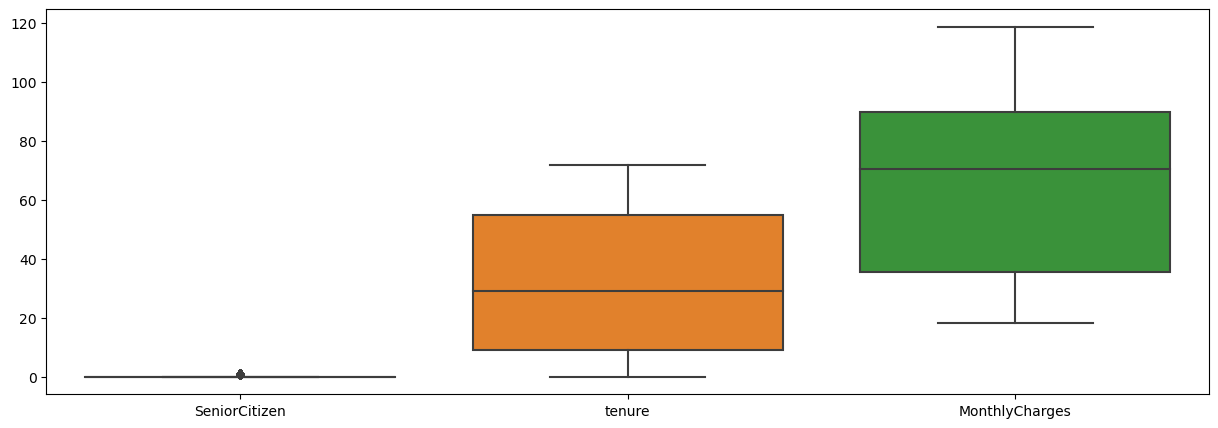

In [30]:
plt.figure(figsize = (15,5))
sns.boxplot(data=tele_dt)
plt.show()

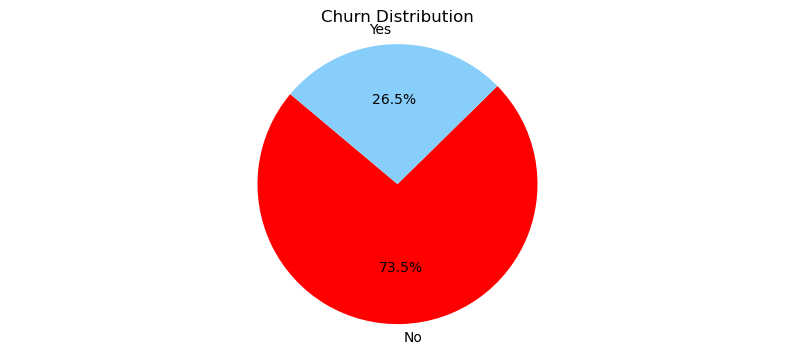

In [36]:
# Count the occurrences of each category in the 'Churn' column
churn_counts = tele_dt['Churn'].value_counts()
# Create the pie chart
plt.figure(figsize=(10, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'lightskyblue'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [37]:
# Define the bar chart function
def bar(feature):
    # Groupby the categorical feature
    temp_dt = tele_dt.groupby([feature, 'Churn']).size().reset_index(name='Count')
    
    # Calculate the value counts of each distribution and its corresponding percentages
    value_counts_dt = tele_dt[feature].value_counts().to_frame().reset_index()
    categories = value_counts_dt['index'].tolist()
    num_list = value_counts_dt[feature].tolist()
    percentage = [round((element / sum(num_list)) * 100, 1) for element in num_list]

    # Formatting functions for the annotations
    def num_format(list_instance):
        formatted_str = ', '.join([f'{num}%' for num in list_instance[:-1]])
        formatted_str += f' & {list_instance[-1]}%'
        return formatted_str

    def str_format(list_instance):
        formatted_str = ', '.join([f'{cat}' for cat in list_instance[:-1]])
        formatted_str += f' & {list_instance[-1]}'
        return formatted_str

    num_str = num_format(percentage)
    cat_str = str_format(categories)

    # Set up the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='Count', hue='Churn', data=temp_dt, palette=["green", "red"])

    # Add annotations
    plt.annotate(
        f'Value count distribution of {cat_str} are\n{num_str} respectively.',
        xy=(1, 1), xycoords='axes fraction',
        xytext=(1.2, 1.2), textcoords='axes fraction',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
        ha='center', va='center')

    plt.title(f'Churn rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.show()

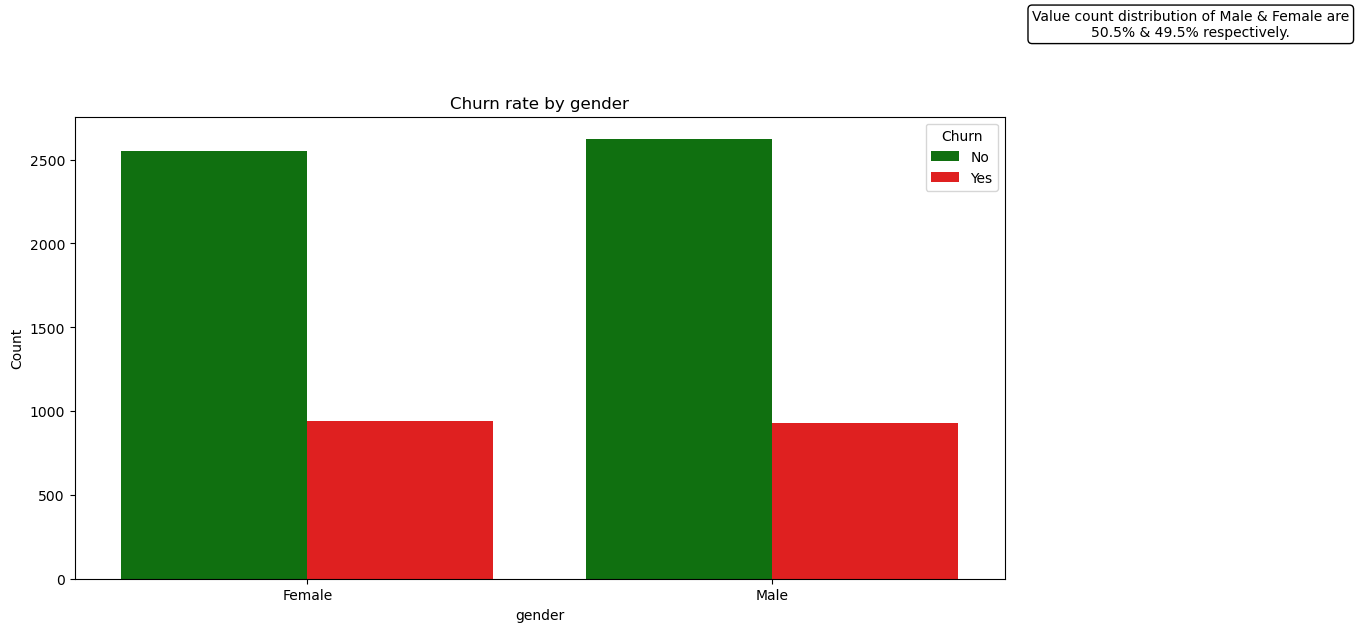

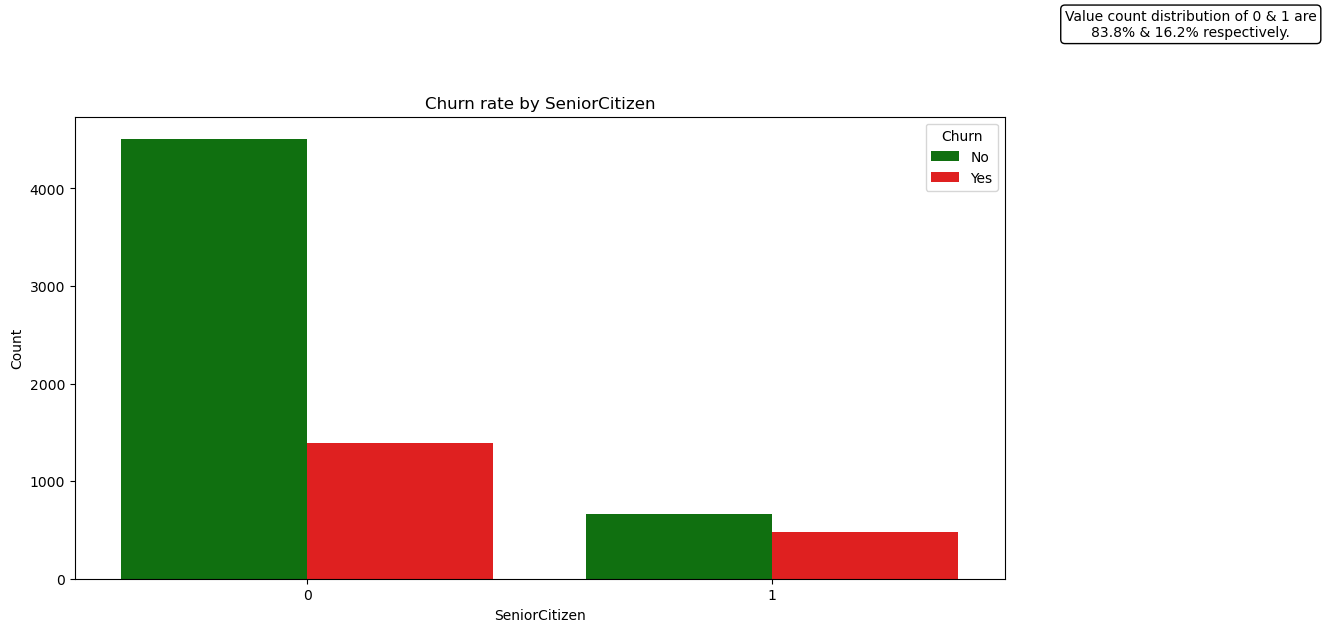

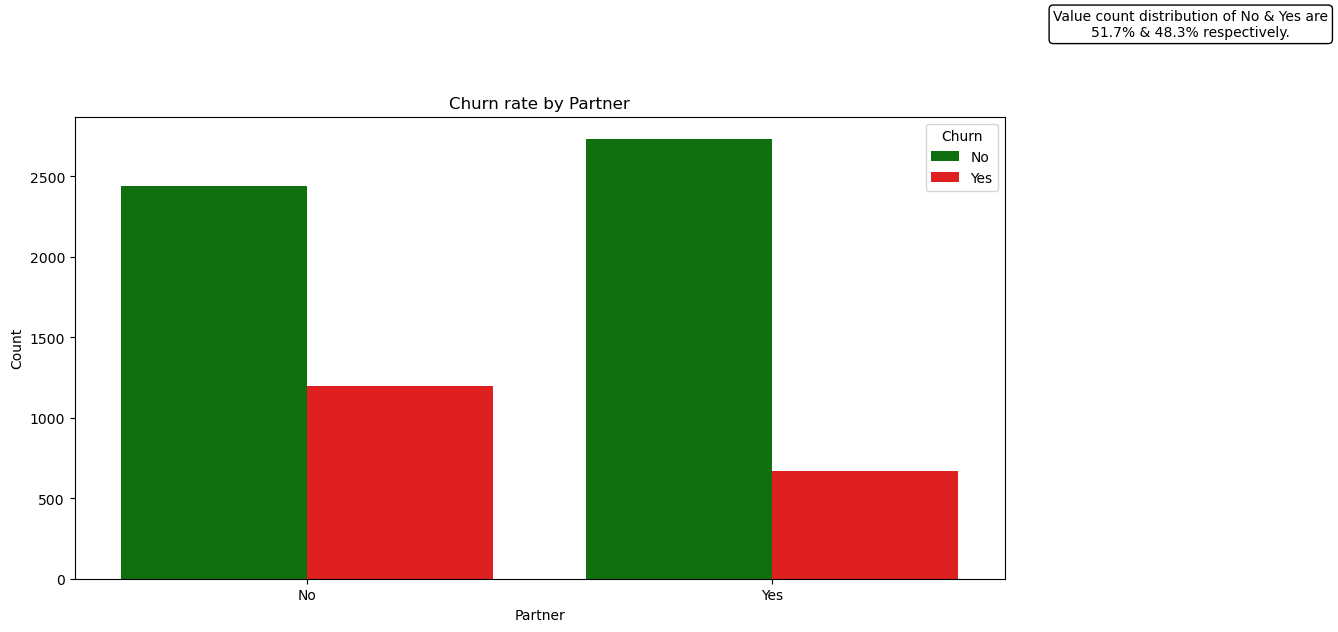

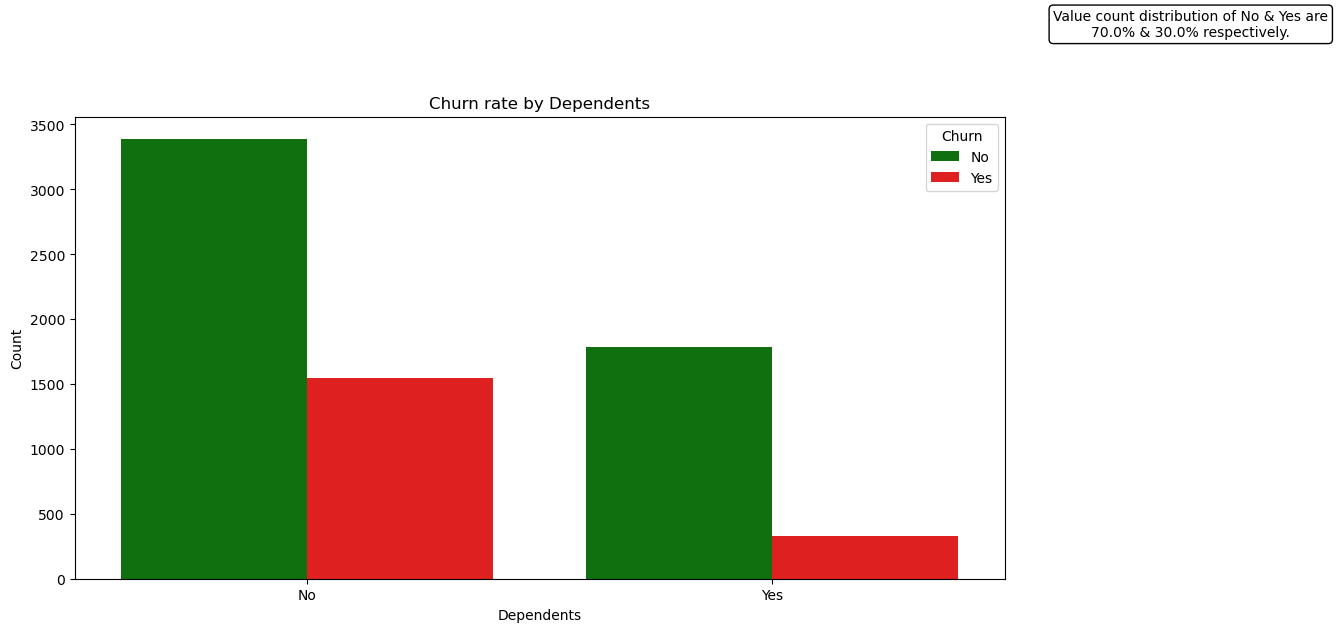

In [38]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Generate bar charts for each feature
for feature in features:
    bar(feature)

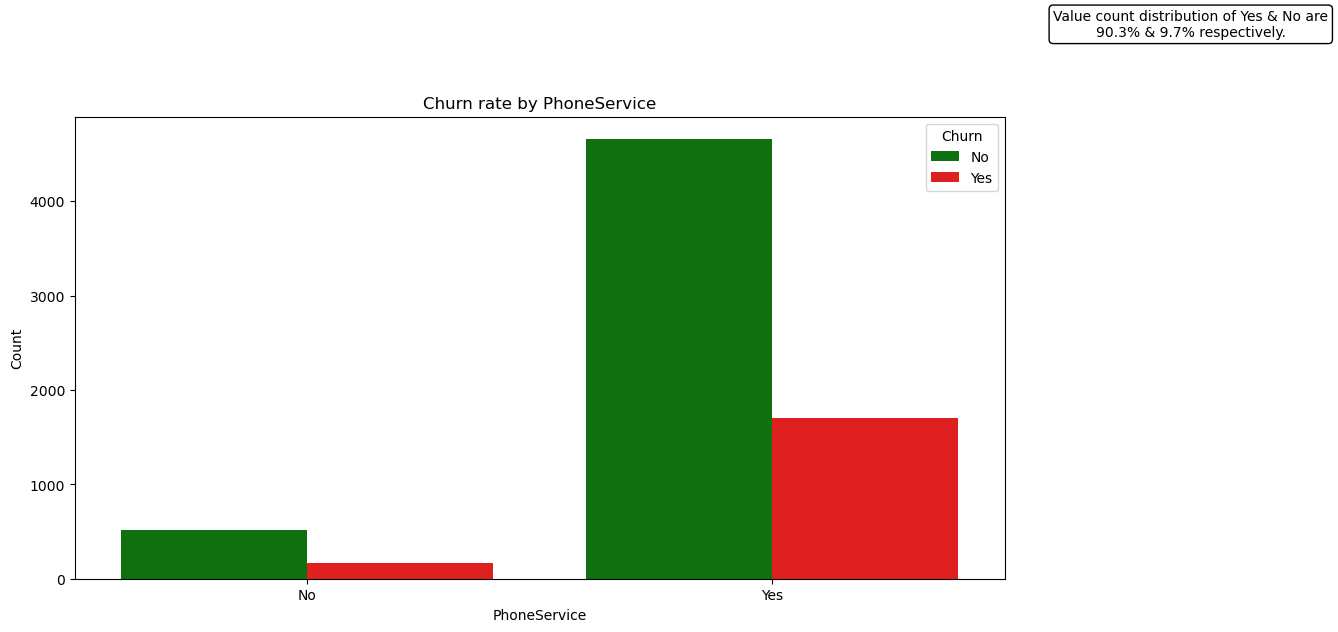

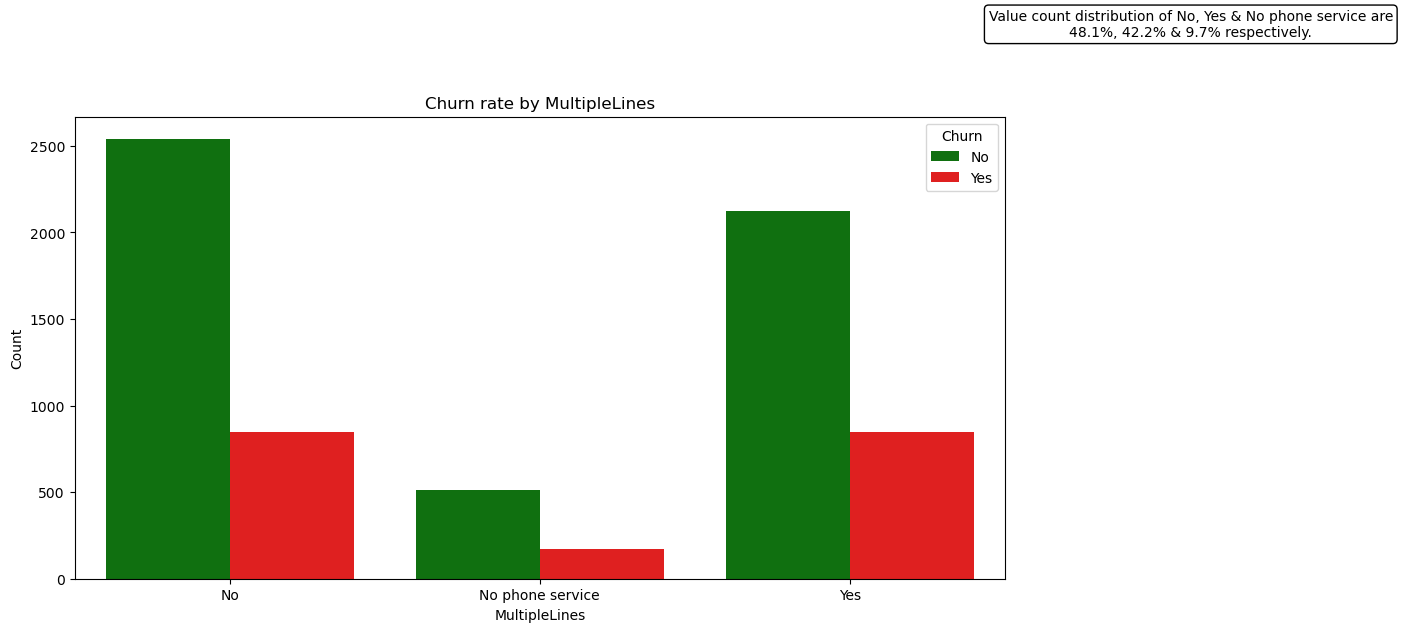

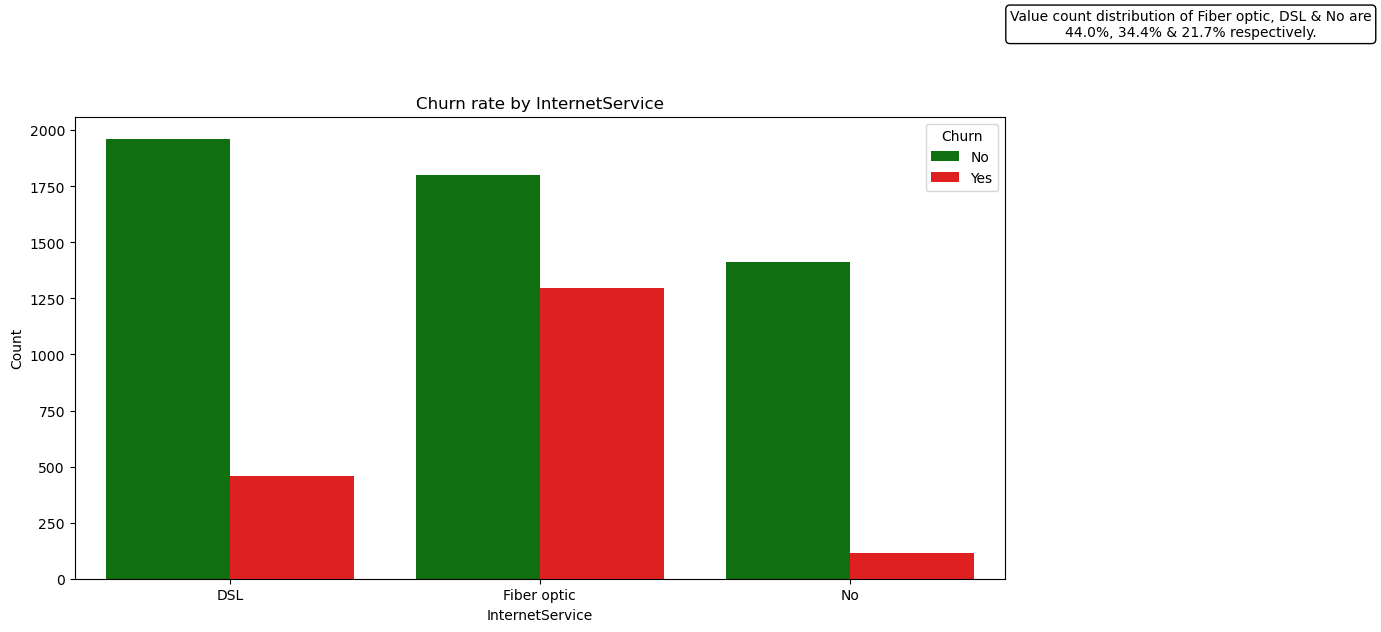

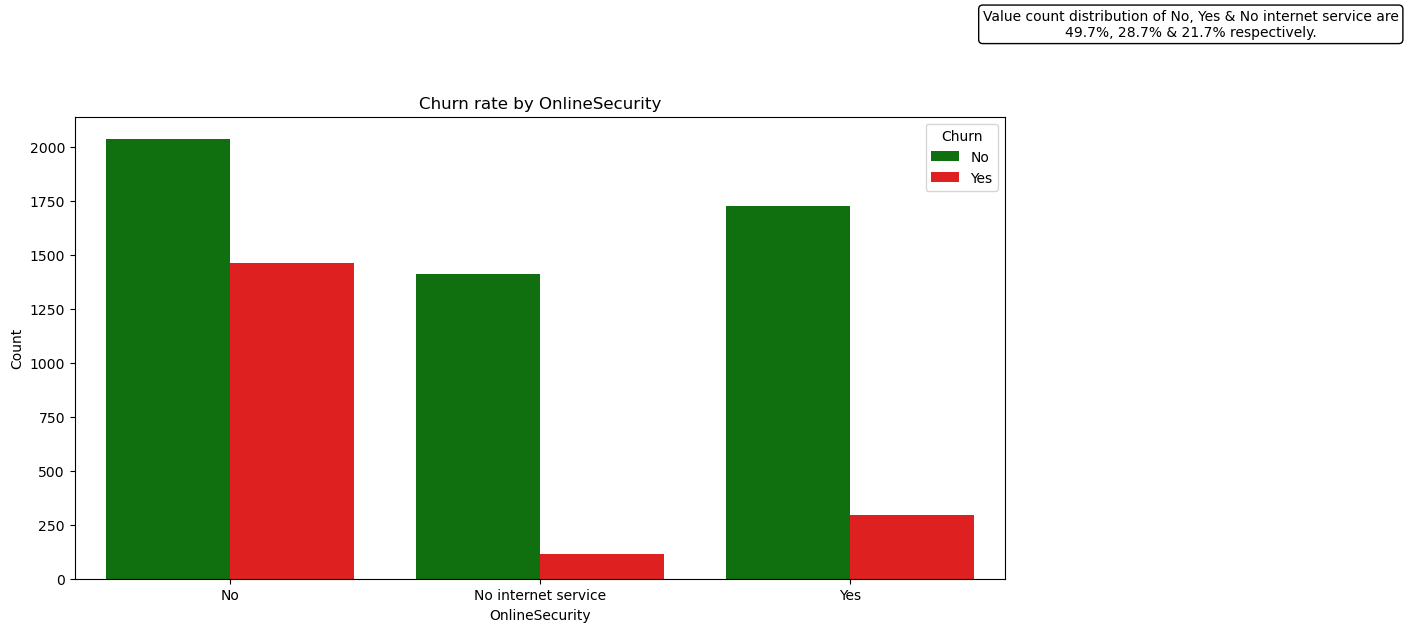

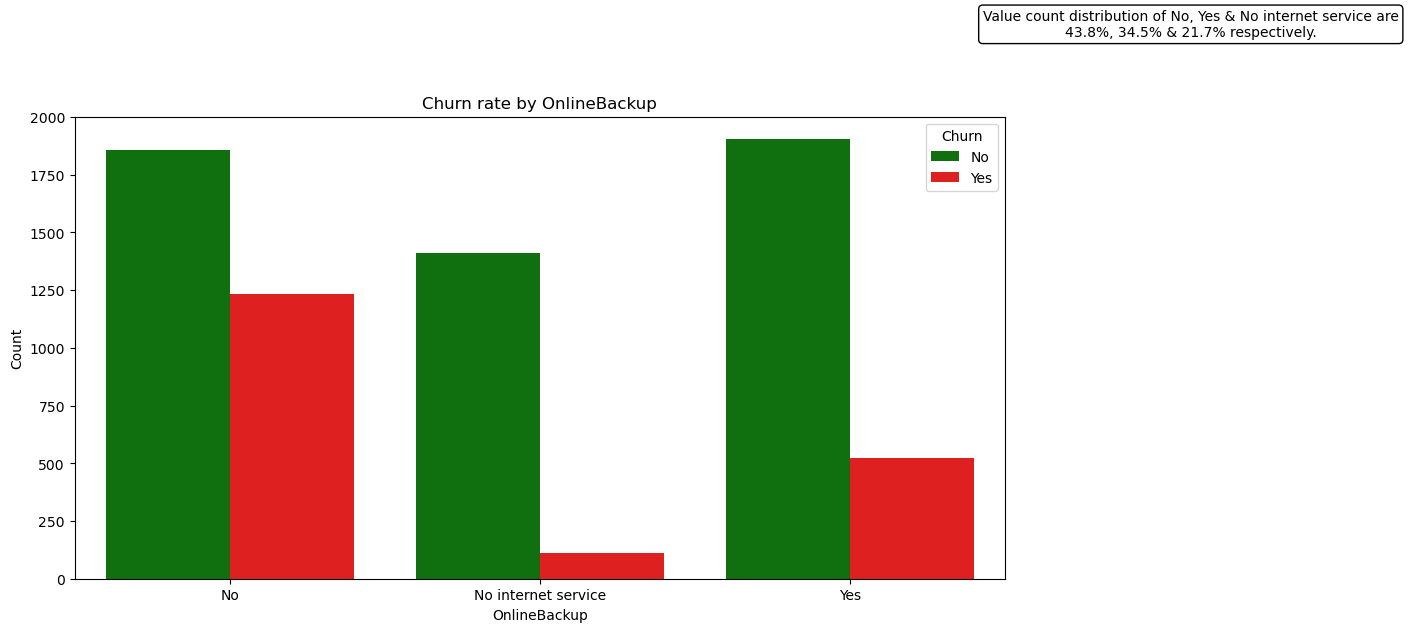

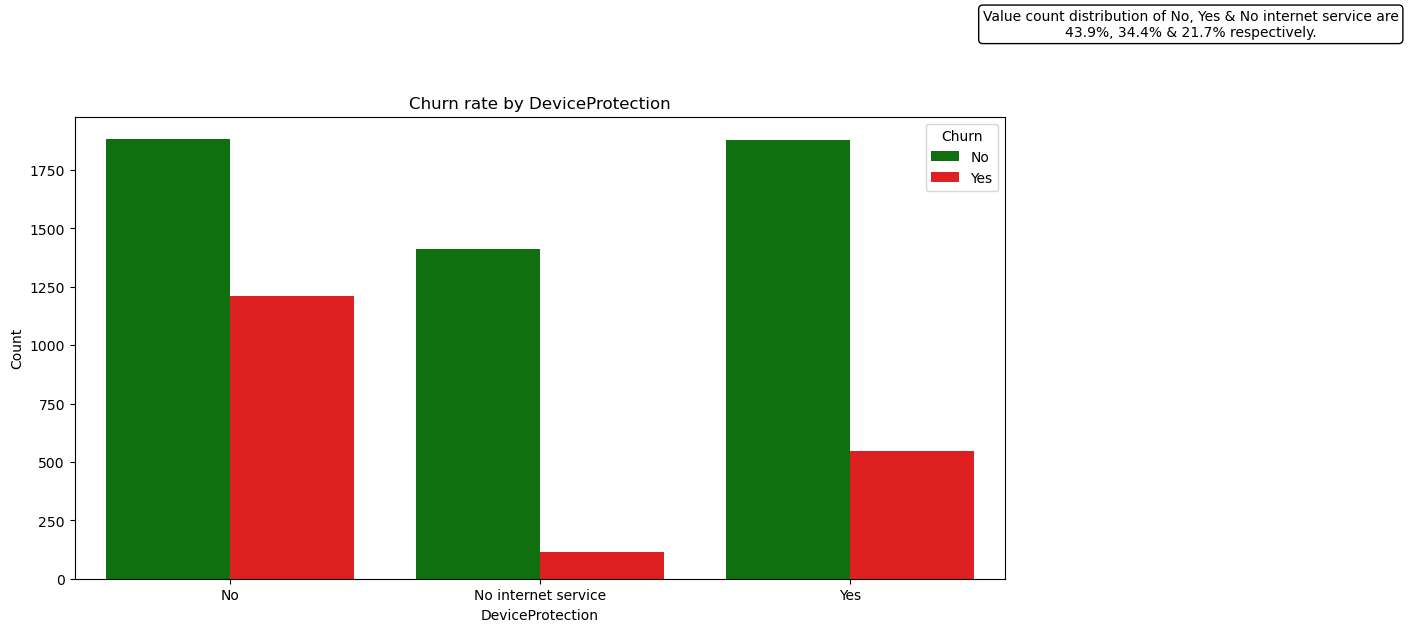

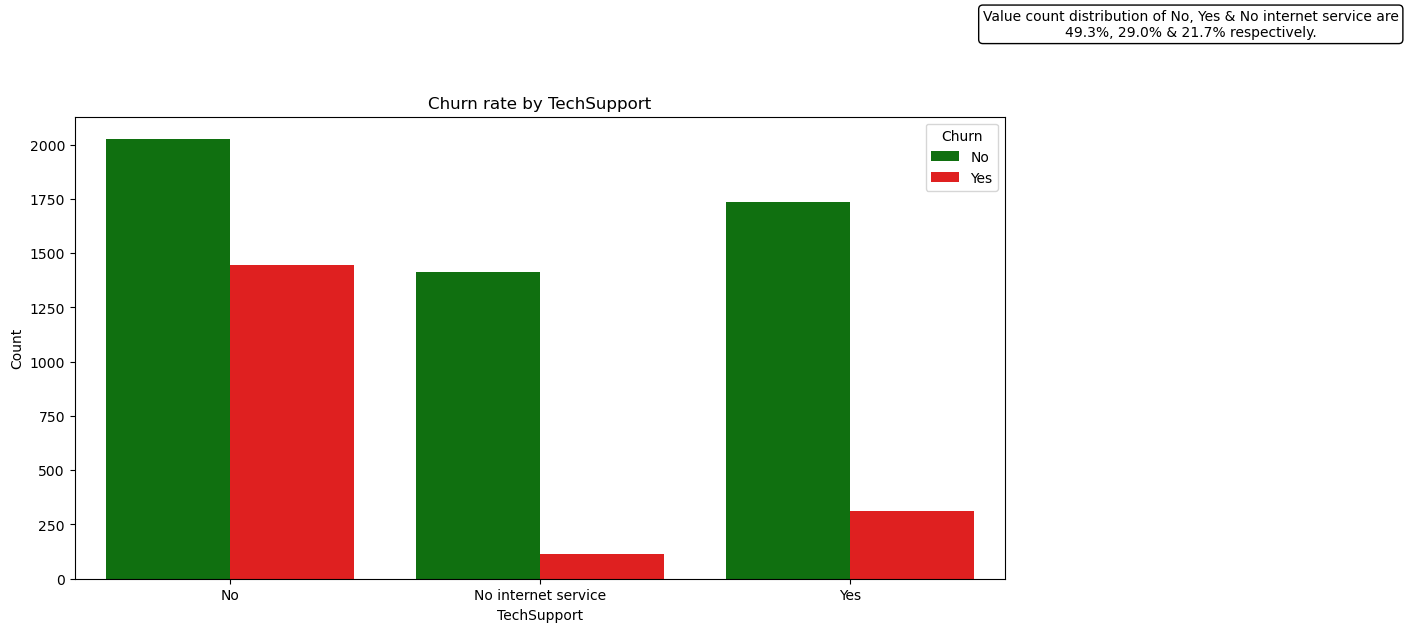

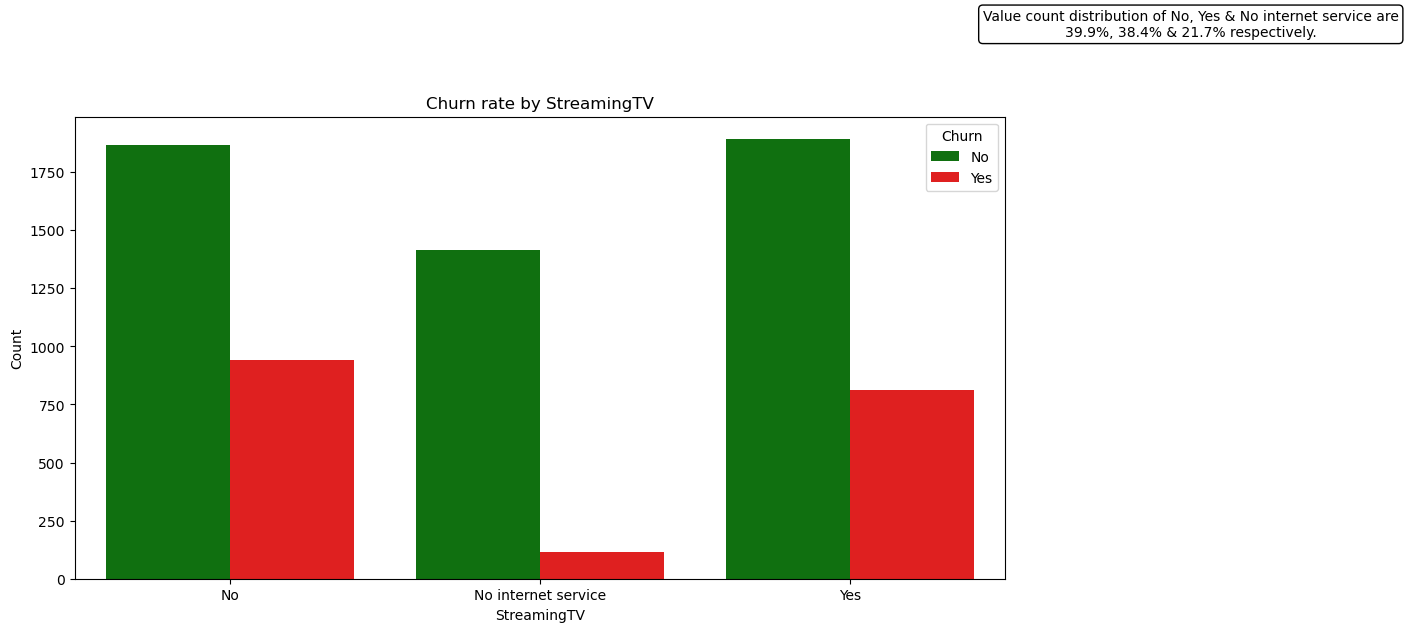

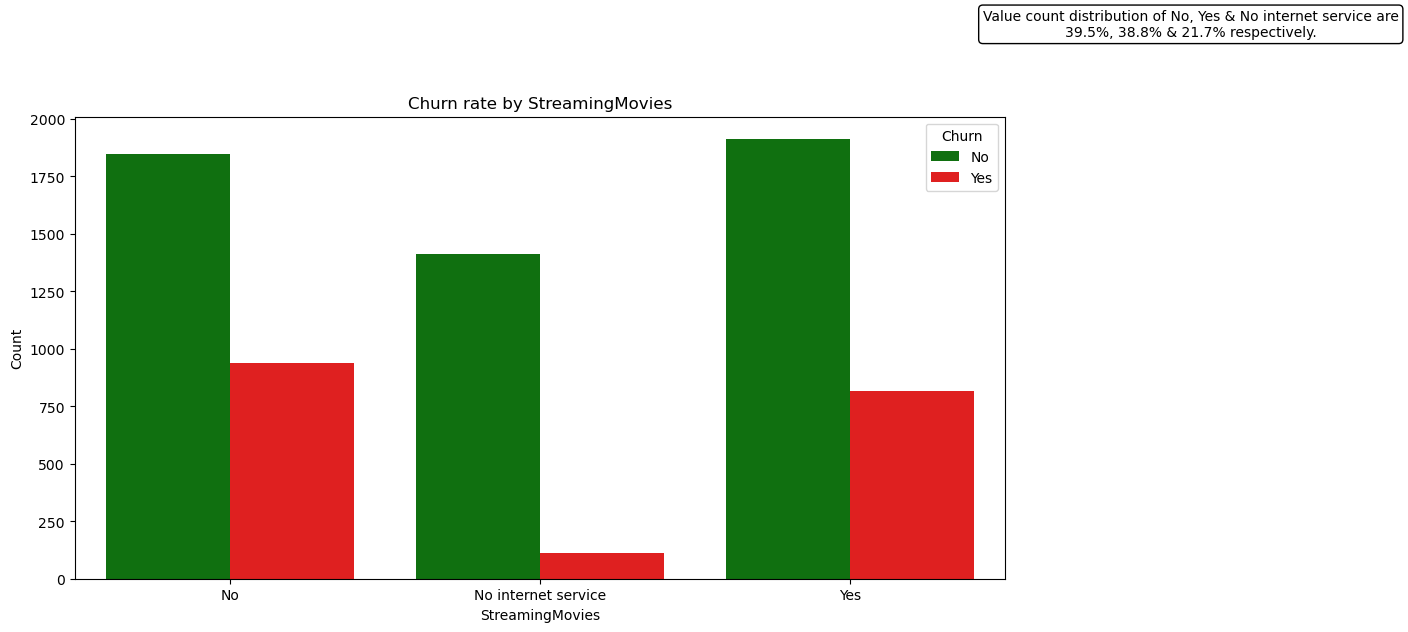

In [39]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')